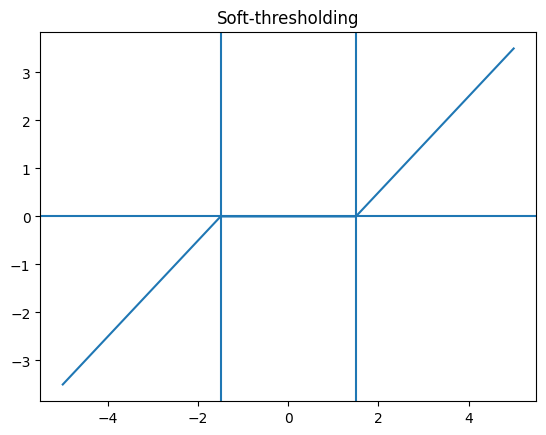

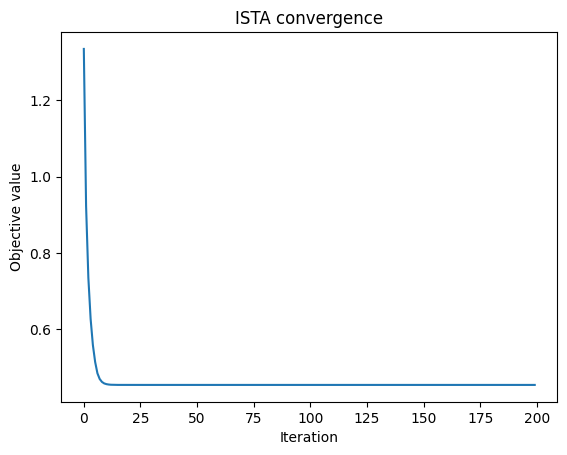

Nombre de coefficients non nuls : 5
Indices des coefficients non nuls : [0 1 2 3 4]


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# --------------------------------------------------
# Opérateur de seuillage doux (Soft-Thresholding)
# prox_{gamma ||.||1}(v) = sign(v) * max(|v| - gamma, 0)
# --------------------------------------------------
def soft_thresholding(v, gamma):
    return np.sign(v) * np.maximum(np.abs(v) - gamma, 0)

# Visualisation du soft-thresholding
v = np.linspace(-5, 5, 400)
gamma = 1.5
prox_v = soft_thresholding(v, gamma)

plt.plot(v, prox_v)
plt.axvline(gamma)
plt.axvline(-gamma)
plt.axhline(0)
plt.title("Soft-thresholding")
plt.show()

# --------------------------------------------------
# Données synthétiques pour le Lasso
# --------------------------------------------------
np.random.seed(0)

n = 100
d = 50
k = 5

X = np.random.randn(n, d)

w_true = np.zeros(d)
w_true[:k] = np.random.randn(k)

y = X @ w_true + 0.1 * np.random.randn(n)

# --------------------------------------------------
# Gradient de f(w) = (1/2n)||Xw - y||^2
# --------------------------------------------------
def gradient_f(w, X, y):
    n = X.shape[0]
    return (1 / n) * X.T @ (X @ w - y)

# --------------------------------------------------
# Constante de Lipschitz L = (1/n) * lambda_max(X^T X)
# --------------------------------------------------
XtX = X.T @ X
L = (1 / n) * np.max(np.linalg.eigvals(XtX).real)

# --------------------------------------------------
# Algorithme ISTA (manuel)
# --------------------------------------------------
def ista(X, y, lam, max_iter=200):
    n, d = X.shape
    w = np.zeros(d)
    obj = []

    for _ in range(max_iter):
        grad = gradient_f(w, X, y)
        w = soft_thresholding(w - (1 / L) * grad, lam / L)

        value = (1 / (2 * n)) * np.linalg.norm(X @ w - y)**2 \
                + lam * np.linalg.norm(w, 1)
        obj.append(value)

    return w, obj

# --------------------------------------------------
# Exécution de ISTA
# --------------------------------------------------
lam = 0.1
w_est, obj_values = ista(X, y, lam)

plt.plot(obj_values)
plt.xlabel("Iteration")
plt.ylabel("Objective value")
plt.title("ISTA convergence")
plt.show()

# --------------------------------------------------
# Résultat : parcimonie
# --------------------------------------------------
print("Nombre de coefficients non nuls :", np.sum(w_est != 0))
print("Indices des coefficients non nuls :", np.where(w_est != 0)[0])